In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'QzpcVXNlcnNcVXNlclxEb2N1bWVudHNcR2l0SHViXHByaW1lbnVtYmVyc2FtLmdpdGh1Yi5pb1x0aW1lLXNlcmllc1xjb3JyZWxhdGlvbl9jcnlwdG8='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

{"C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\importlib\\_bootstrap.py": 1738654656.0, "C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\importlib\\_bootstrap_external.py": 1738654656.0, "C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\zipimport.py": 1738654656.0, "C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\codecs.py": 1738654656.0, "C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\encodings\\aliases.py": 1738654656.0, "C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\encodings\\__init__.py": 1738654656.0, "C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\encodings\\utf_8.py": 1738654656.0, "C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\encodings\\cp949.py": 1738654656.0, "C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\abc.py": 1738654656.0, "C:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\i

In [2]:
# 분석 결과 (Results)

# 여러 거래소에서 지원하는 거래쌍을 확인

import ccxt
import pandas as pd

# 주요 암호화폐 목록
TICKER_COIN = ['BTC/USDT', 'ETH/USDT', 'USDT/USD', 'XRP/USDT', 'SOL/USDT', 'LINK/USDT', 'ONDO/USDT', 'ADA/USDT', 'TRX/USDT', 'DOGE/USDT']

# 지원하는 거래소 목록
exchanges = ['binance', 'kraken', 'bitfinex', 'poloniex']

# 각 거래소에서 지원하는 거래쌍 확인
for exchange_id in exchanges:
    exchange = getattr(ccxt, exchange_id)()
    markets = exchange.load_markets()
    supported_pairs = [pair for pair in TICKER_COIN if pair in markets]
    print(f"{exchange_id} supports: {supported_pairs}")

# 주요 암호화폐 목록
binance_tickers = ['BTC/USDT', 'ETH/USDT', 'XRP/USDT', 'SOL/USDT', 'LINK/USDT', 'ADA/USDT', 'TRX/USDT', 'DOGE/USDT']
kraken_tickers = ['USDT/USD']
poloniex_tickers = ['ONDO/USDT']

# 데이터 기간 설정
START_DATE = '2024-03-01'
END_DATE = '2025-02-28'

# 거래소 설정
binance = ccxt.binance()
kraken = ccxt.kraken()
poloniex = ccxt.poloniex()

# 데이터 불러오기 함수
def fetch_crypto_data(exchange, tickers, start, end):
    data = {}
    start_timestamp = exchange.parse8601(f'{start}T00:00:00Z')
    end_timestamp = exchange.parse8601(f'{end}T00:00:00Z')
    for ticker in tickers:
        try:
            ohlcv = exchange.fetch_ohlcv(ticker, '1d', since=start_timestamp, limit=1000)
            df = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
            df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
            df.set_index('timestamp', inplace=True)
            data[ticker] = df['close']
        except Exception as e:
            print(f"Error fetching {ticker} from {exchange.id}: {e}")
    return pd.DataFrame(data)

# 데이터 불러오기
binance_data = fetch_crypto_data(binance, binance_tickers, START_DATE, END_DATE)
kraken_data = fetch_crypto_data(kraken, kraken_tickers, START_DATE, END_DATE)
poloniex_data = fetch_crypto_data(poloniex, poloniex_tickers, START_DATE, END_DATE)

# 모든 데이터를 하나의 DataFrame으로 병합
crypto_prices = pd.concat([binance_data, kraken_data, poloniex_data], axis=1)

# 1) 일간 수익률 계산
def compute_returns(price_data: pd.DataFrame) -> pd.DataFrame:
    return price_data.pct_change().dropna(how='all')

crypto_returns = compute_returns(crypto_prices)

# 2) 롤링 상관계수 계산
def rolling_correlation(returns: pd.DataFrame, window: int) -> pd.DataFrame:
    """
    returns: (date x tickers) DataFrame
    window:  rolling window size (days)
    
    returns.rolling(window).corr() 결과는
      - MultiIndex (date, ticker1)
      - columns = ticker2
    형태를 가집니다.
    """
    corr_rolling = returns.rolling(window).corr()
    return corr_rolling

# 3) 날짜별 상관행렬을 모아서 평균 상관행렬을 산출
def average_correlation_matrix(returns: pd.DataFrame, window: int) -> pd.DataFrame:
    """
    - returns.rolling(window).corr() 결과를 사용
    - 각 날짜별 (티커 x 티커) 상관행렬을 합산 후, 날짜 개수로 나누어 평균
    """
    corr_rolling = rolling_correlation(returns, window)
    
    # MultiIndex에서 날짜(level=0) 목록을 추출
    unique_dates = corr_rolling.index.get_level_values(0).unique()
    tickers = returns.columns
    
    # 상관행렬 누적 합을 위한 (티커 x 티커) 형태의 빈 DataFrame
    sum_matrix = pd.DataFrame(0.0, index=tickers, columns=tickers)
    count = 0
    
    for date in unique_dates:
        # (ticker1 x ticker2) 형태를 얻기 위해 xs(date, level=0)
        date_corr = corr_rolling.xs(date, level=0)
        # date_corr.index = ticker1, date_corr.columns = ticker2
        
        # 혹시 일부 티커에 대한 데이터가 누락되었을 경우를 대비하여 reindex
        date_corr = date_corr.reindex(index=tickers, columns=tickers)
        
        # 날짜별 상관행렬(N x N)을 모두 누적
        if date_corr.notna().all().all():
            sum_matrix += date_corr.fillna(0.0)
            count += 1
    
    # 평균 계산 (count가 0이 되지 않는다고 가정)
    mean_matrix = sum_matrix / count
    
    return mean_matrix

# 4) 롤링 상관계수 평균 계산
rolling_corr_results = {}
for window in [30, 60, 90]:
    mean_corr_matrix = average_correlation_matrix(crypto_returns, window)
    rolling_corr_results[window] = mean_corr_matrix

binance supports: ['BTC/USDT', 'ETH/USDT', 'XRP/USDT', 'SOL/USDT', 'LINK/USDT', 'ADA/USDT', 'TRX/USDT', 'DOGE/USDT']


kraken supports: ['BTC/USDT', 'ETH/USDT', 'USDT/USD', 'XRP/USDT', 'SOL/USDT', 'LINK/USDT', 'ADA/USDT', 'DOGE/USDT']


bitfinex supports: ['BTC/USDT', 'ETH/USDT', 'USDT/USD', 'XRP/USDT', 'SOL/USDT', 'LINK/USDT', 'ADA/USDT', 'TRX/USDT', 'DOGE/USDT']


poloniex supports: ['BTC/USDT', 'ETH/USDT', 'XRP/USDT', 'SOL/USDT', 'LINK/USDT', 'ONDO/USDT', 'ADA/USDT', 'TRX/USDT', 'DOGE/USDT']



[Window = 30 days] Mean Correlation Matrix
            BTC/USDT  ETH/USDT  XRP/USDT  SOL/USDT  LINK/USDT  ADA/USDT  TRX/USDT  DOGE/USDT  USDT/USD  ONDO/USDT
BTC/USDT   1.000000  0.798172  0.568793  0.741562   0.684016  0.704388  0.382560   0.812617  0.451183   0.348414
ETH/USDT   0.798172  1.000000  0.558232  0.702440   0.736765  0.718560  0.379430   0.745929  0.285172   0.378550
XRP/USDT   0.568793  0.558232  1.000000  0.552359   0.568689  0.652055  0.316217   0.590962  0.166150   0.229257
SOL/USDT   0.741562  0.702440  0.552359  1.000000   0.673083  0.683522  0.319013   0.693735  0.253296   0.301020
LINK/USDT  0.684016  0.736765  0.568689  0.673083   1.000000  0.758006  0.311646   0.668272  0.232860   0.414728
ADA/USDT   0.704388  0.718560  0.652055  0.683522   0.758006  1.000000  0.414331   0.724537  0.257403   0.326675
TRX/USDT   0.382560  0.379430  0.316217  0.319013   0.311646  0.414331  1.000000   0.367638  0.183792   0.113525
DOGE/USDT  0.812617  0.745929  0.590962  0.693735  

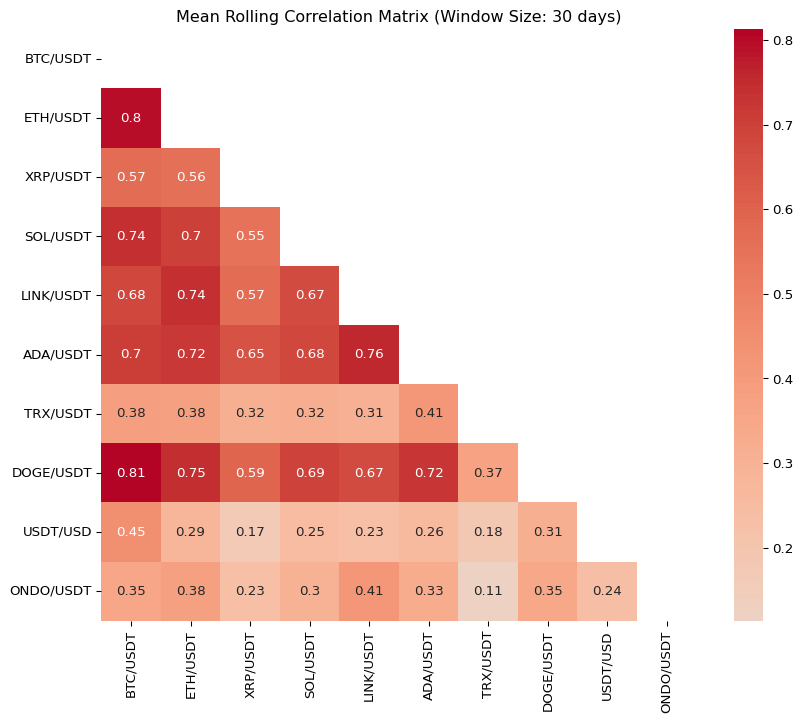


[Window = 60 days] Mean Correlation Matrix
            BTC/USDT  ETH/USDT  XRP/USDT  SOL/USDT  LINK/USDT  ADA/USDT  TRX/USDT  DOGE/USDT  USDT/USD  ONDO/USDT
BTC/USDT   1.000000  0.794662  0.516195  0.739696   0.663902  0.687504  0.317111   0.814231  0.441950   0.342878
ETH/USDT   0.794662  1.000000  0.497307  0.687035   0.709789  0.690926  0.305710   0.725791  0.290861   0.368161
XRP/USDT   0.516195  0.497307  1.000000  0.502765   0.536458  0.630467  0.269367   0.539359  0.129029   0.202273
SOL/USDT   0.739696  0.687035  0.502765  1.000000   0.650992  0.666587  0.271513   0.685488  0.236088   0.281512
LINK/USDT  0.663902  0.709789  0.536458  0.650992   1.000000  0.742267  0.256307   0.639037  0.216507   0.396719
ADA/USDT   0.687504  0.690926  0.630467  0.666587   0.742267  1.000000  0.367636   0.707792  0.238711   0.308556
TRX/USDT   0.317111  0.305710  0.269367  0.271513   0.256307  0.367636  1.000000   0.305177  0.153642   0.087286
DOGE/USDT  0.814231  0.725791  0.539359  0.685488  

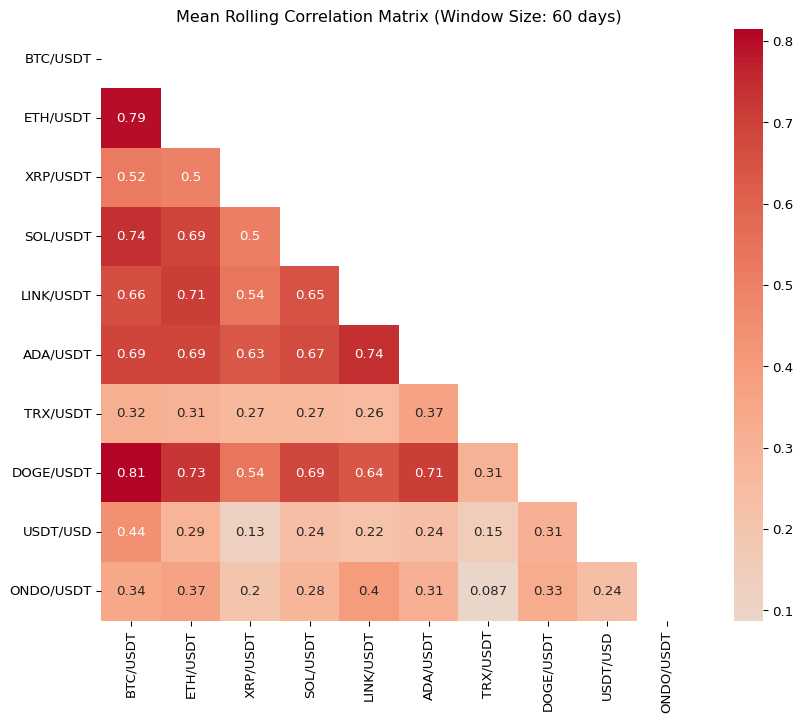


[Window = 90 days] Mean Correlation Matrix
            BTC/USDT  ETH/USDT  XRP/USDT  SOL/USDT  LINK/USDT  ADA/USDT  TRX/USDT  DOGE/USDT  USDT/USD  ONDO/USDT
BTC/USDT   1.000000  0.793163  0.473932  0.741763   0.646089  0.679090  0.269482   0.810721  0.428443   0.341143
ETH/USDT   0.793163  1.000000  0.450434  0.688743   0.696548  0.672273  0.242421   0.708298  0.284106   0.366089
XRP/USDT   0.473932  0.450434  1.000000  0.456334   0.504173  0.609370  0.232145   0.494873  0.101245   0.191231
SOL/USDT   0.741763  0.688743  0.456334  1.000000   0.634929  0.653439  0.249769   0.684019  0.236170   0.277555
LINK/USDT  0.646089  0.696548  0.504173  0.634929   1.000000  0.727106  0.214587   0.611760  0.190358   0.385949
ADA/USDT   0.679090  0.672273  0.609370  0.653439   0.727106  1.000000  0.330053   0.693620  0.224136   0.298962
TRX/USDT   0.269482  0.242421  0.232145  0.249769   0.214587  0.330053  1.000000   0.246588  0.127256   0.080028
DOGE/USDT  0.810721  0.708298  0.494873  0.684019  

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 모든 행과 열이 출력되도록 설정
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.expand_frame_repr', False)

# 결과 출력 및 시각화
for window, result in rolling_corr_results.items():
    # 상관 행렬을 DataFrame으로 변환
    result_df = result.dropna(how='all')
    print(f"\n[Window = {window} days] Mean Correlation Matrix\n", result_df)
    
    # 히트맵 시각화
    plt.figure(figsize=(10, 8))
    
    # 대각선 요소를 마스킹
    mask = np.triu(np.ones(result_df.shape, dtype=bool))
    
    sns.heatmap(result_df, annot=True, cmap='coolwarm', center=0, mask=mask)
    plt.title(f'Mean Rolling Correlation Matrix (Window Size: {window} days)')
    plt.show()